## Task - 1

## Sentiment Analysis on Product Reviews

In [6]:
#!pip install wordcloud


In [10]:
# Data & Viz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Text Processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer
from bs4 import BeautifulSoup
import re

# ML
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# WordCloud
from wordcloud import WordCloud

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Download stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nisha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# Load your dataset (make sure dataset.csv is in the same folder as your notebook)
data = pd.read_csv("dataset.csv")

print("Dataset Shape:", data.shape)
data.head(10)


Dataset Shape: (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [18]:
data.tail(10)

,review,sentiment
49990,"Lame, lame, lame!!! A 90-minute cringe-fest th...",negative
49991,"Les Visiteurs, the first movie about the medie...",negative
49992,John Garfield plays a Marine who is blinded by...,positive
49993,Robert Colomb has two full-time jobs. He's kno...,negative
49994,This is your typical junk comedy.<br /><br />T...,negative
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [30]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

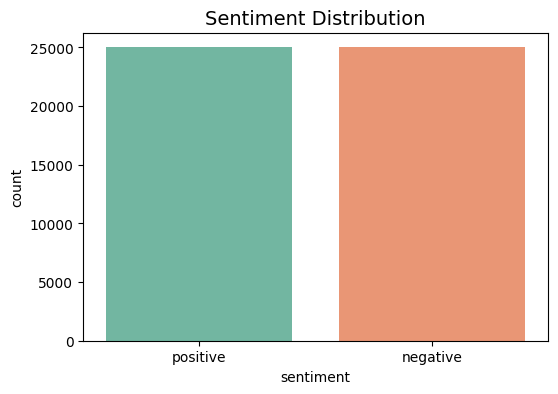

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(x="sentiment", data=data, palette="Set2")
plt.title("Sentiment Distribution", fontsize=14)
plt.show()

data['sentiment'].value_counts()


In [36]:
train_reviews = data.review[:40000]
train_sentiments = data.sentiment[:40000]
test_reviews = data.review[40000:]
test_sentiments = data.sentiment[40000:]

print("Train Reviews:", train_reviews.shape)
print("Test Reviews:", test_reviews.shape)


Train Reviews: (40000,)
Test Reviews: (10000,)


In [38]:
## Text Preprocessing

In [41]:
tokenizer = ToktokTokenizer()
stopword_list = stopwords.words("english")

def strip_html(text):
    return BeautifulSoup(text, "html.parser").get_text()

def remove_special_characters(text):
    return re.sub(r"[^a-zA-Z0-9\s]", "", text)

def remove_stopwords(text):
    tokens = tokenizer.tokenize(text)
    tokens = [t.strip() for t in tokens]
    return " ".join([t for t in tokens if t.lower() not in stopword_list])

def normalize_text(text):
    text = strip_html(text)
    text = remove_special_characters(text)
    text = remove_stopwords(text)
    return text.lower()

# Apply cleaning
data["cleaned_review"] = data["review"].apply(normalize_text)

# Train/Test cleaned reviews
norm_train_reviews = data.cleaned_review[:40000]
norm_test_reviews = data.cleaned_review[40000:]


In [42]:
## WordClouds

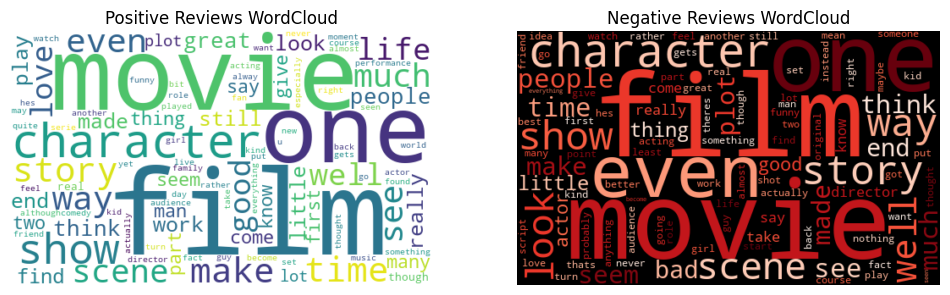

In [45]:
positive_text = " ".join(data[data["sentiment"]=="positive"]["cleaned_review"])
negative_text = " ".join(data[data["sentiment"]=="negative"]["cleaned_review"])

plt.figure(figsize=(12,6))

# Positive
plt.subplot(1,2,1)
wc_pos = WordCloud(width=500, height=300, max_words=100, background_color="white").generate(positive_text)
plt.imshow(wc_pos, interpolation="bilinear")
plt.title("Positive Reviews WordCloud")
plt.axis("off")

# Negative
plt.subplot(1,2,2)
wc_neg = WordCloud(width=500, height=300, max_words=100, background_color="black", colormap="Reds").generate(negative_text)
plt.imshow(wc_neg, interpolation="bilinear")
plt.title("Negative Reviews WordCloud")
plt.axis("off")

plt.show()


In [46]:
## Feature Extraction (BoW & TF-IDF)

In [50]:
# Bag of Words
cv = CountVectorizer(max_df=0.9, min_df=2, ngram_range=(1,2), max_features=5000)
cv_train_reviews = cv.fit_transform(norm_train_reviews)
cv_test_reviews = cv.transform(norm_test_reviews)

# TF-IDF
tv = TfidfVectorizer(max_df=0.9, min_df=2, ngram_range=(1,2), max_features=5000)
tv_train_reviews = tv.fit_transform(norm_train_reviews)
tv_test_reviews = tv.transform(norm_test_reviews)

# Encode labels
lb = LabelBinarizer()
sentiment_data = lb.fit_transform(data["sentiment"])
train_sentiments = sentiment_data[:40000]
test_sentiments = sentiment_data[40000:]


## Logistic Regression Mode

In [53]:
lr = LogisticRegression(max_iter=500, C=1, random_state=42)

# Train & Predict with BoW
lr_bow = lr.fit(cv_train_reviews, train_sentiments)
lr_bow_predict = lr.predict(cv_test_reviews)

# Train & Predict with TF-IDF
lr_tfidf = lr.fit(tv_train_reviews, train_sentiments)
lr_tfidf_predict = lr.predict(tv_test_reviews)

print("BoW Accuracy:", accuracy_score(test_sentiments, lr_bow_predict))
print("TF-IDF Accuracy:", accuracy_score(test_sentiments, lr_tfidf_predict))


BoW Accuracy: 0.8712
TF-IDF Accuracy: 0.889


In [55]:
## Reports

In [57]:
print("Classification Report (BoW):\n", classification_report(test_sentiments, lr_bow_predict, target_names=['Negative','Positive']))
print("Classification Report (TF-IDF):\n", classification_report(test_sentiments, lr_tfidf_predict, target_names=['Negative','Positive']))


Classification Report (BoW):
               precision    recall  f1-score   support

    Negative       0.87      0.87      0.87      4993
    Positive       0.87      0.87      0.87      5007

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Classification Report (TF-IDF):
               precision    recall  f1-score   support

    Negative       0.89      0.88      0.89      4993
    Positive       0.88      0.90      0.89      5007

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



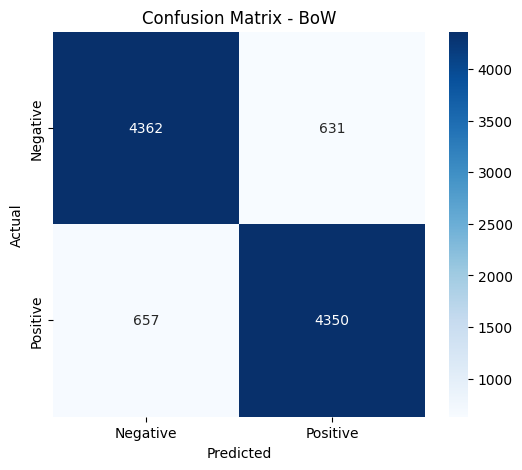

In [59]:
# BoW Confusion Matrix
cm_bow = confusion_matrix(test_sentiments, lr_bow_predict)
plt.figure(figsize=(6,5))
sns.heatmap(cm_bow, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.title("Confusion Matrix - BoW")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

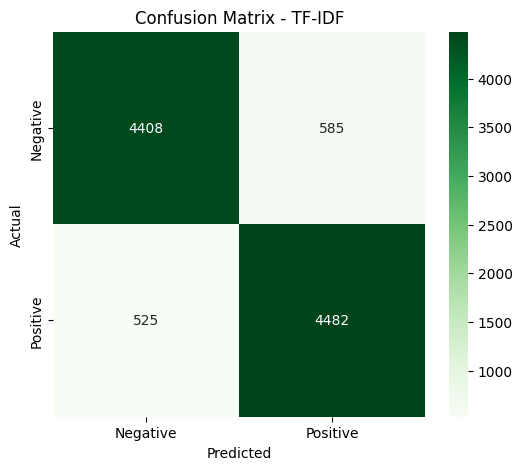

In [61]:
# TF-IDF Confusion Matrix
cm_tfidf = confusion_matrix(test_sentiments, lr_tfidf_predict)
plt.figure(figsize=(6,5))
sns.heatmap(cm_tfidf, annot=True, fmt="d", cmap="Greens", xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.title("Confusion Matrix - TF-IDF")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [63]:
def predict_sentiment(review):
    review = normalize_text(review)
    vec = tv.transform([review])   # using TF-IDF
    pred = lr.predict(vec)[0]
    return "Positive" if pred == 1 else "Negative"

print("Custom Predictions:")
print("This product is absolutely fantastic!", "->", predict_sentiment("This product is absolutely fantastic!"))
print("Worst purchase I have ever made.", "->", predict_sentiment("Worst purchase I have ever made."))


Custom Predictions:
This product is absolutely fantastic! -> Positive
Worst purchase I have ever made. -> Negative
